In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data, labels = datasets.make_blobs(n_samples = 200, n_features=3,centers=3 ,random_state=20)
data,data_test,labels,labels_test = train_test_split(data,labels,test_size = 0.2,shuffle=True)
data.shape, data_test.shape, labels.shape, labels_test.shape

((160, 3), (40, 3), (160,), (40,))

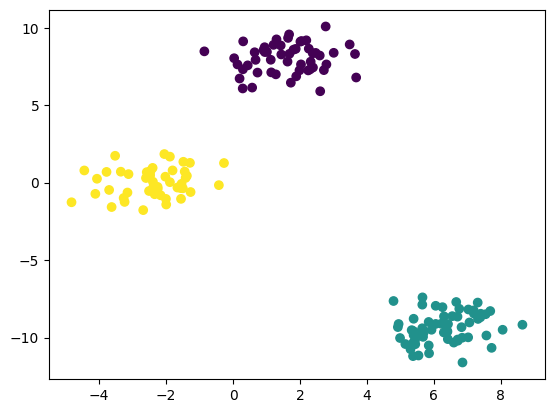

In [3]:
plt.scatter(data[:,0], data[:,1],c = labels)

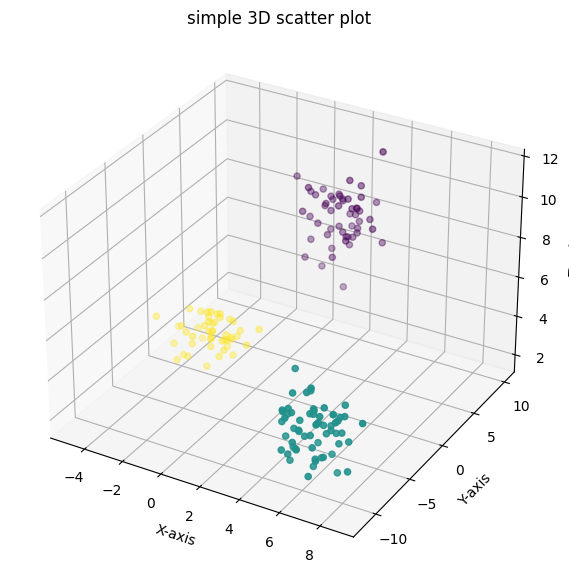

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data[:,0], data[:,1], data[:,2], c = labels)
plt.title("simple 3D scatter plot")

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
 
# show plot
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, labels)
neigh.predict([[7,8,3],[-100,-100,100],[-100,20,0]])

array([0, 1, 2])

In [6]:
class KNN_classifier:
    def __init__(self,k_neighbours):
        self.k_neighbours=k_neighbours

    def minkowski(self,x_tr,x_tt,p=2):  # P=2 refers to euclidean distance
        return (sum([(abs(x_tr[i]-x_tt[i]))**p for i in range(len(x_tr))]))**(1/p)
            
    def fit(self,X,y):
        self.X = X
        self.y = y
    
    def predict(self,x_test,p=2):
        distances = []
        for train_id in range(len(self.X)):
            try:
                if len(x_test) != len(self.X[train_id]):
                    raise Exception
                distances.append([self.minkowski(x_test,self.X[train_id],p), self.y[train_id]])
            except:
                print("Length of train data and prediction data not matching")
                break
        
        distances.sort(key = lambda tup: tup[0])
        freq = np.bincount(np.array(distances, dtype=np.int64)[:self.k_neighbours,1])
        return(np.argmax(freq))     


In [8]:
classifier = KNN_classifier(10)
classifier.fit(data,labels)

# Predicting the Test set results
y_test_pred = []
for i in data_test:
    y_test_pred.append(classifier.predict(i))

from sklearn.metrics import classification_report

acc = sum([1 if y_test_pred[i] == labels_test[i] else 0 for i in range(len(labels_test))])/len(labels_test)
print("Accuracy:",acc)
print(classification_report(labels_test,y_test_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

